# MALIGNANT COMMENTS CLASSIFIER PROJECT

## Introduction
> The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.
Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.
Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 


## About Dataset
The data set contains the training set, which has approximately **1,59,571 samples and the test set which contains nearly 1,53,000 samples**. All the data samples contain **8 fields** which includes ***‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’***. 
The label can be either 0 or 1, where **0 denotes a NO while 1 denotes a YES**. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.   
The data set includes:
-	**Malignant:** It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
-	**Highly Malignant:** It denotes comments that are highly malignant and hurtful. 
-	**Rude:** It denotes comments that are very rude and offensive.
-	**Threat:** It contains indication of the comments that are giving any threat to someone. 	
-	**Abuse:** It is for comments that are abusive in nature. 
-	**Loathe:** It describes the comments which are hateful and loathing in nature.  
-	**ID:** It includes unique Ids associated with each comment text given.   
-	**Comment text:** This column contains the comments extracted from various social media platforms. 


## Load Dataset

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#supressing simple warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading train dataset
df_train = pd.read_csv('train.csv')

#interpreting first 10 rows of dataset
df_train.head(10)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


## Data Analysis

In [3]:
#checking shape of dataset
df_train.shape

(159571, 8)

#### Remarks:
- Dataset consists of **159571 records with 8 features**.

In [4]:
#checking general information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


#### Remarks:
- There are 8 features out of which **2 are of object type and 6 are of int type.**
- Non-Null Count shows, **no null values are present** in dataset.

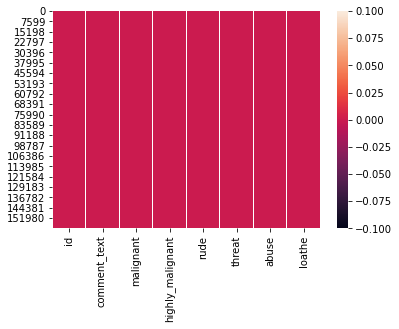

In [5]:
#depicting null values using heatmap
sns.heatmap(df_train.isnull())
plt.show()

#### Remarks:
- No null values found in dataset.

In [6]:
#checking ratio of data which contains malignant comments and normal or unoffensive comments.
output_labels = df_train.columns[2:]

#counting non-zero rows i.e Malignant Comments
malignant_comments = len(df_train[df_train[output_labels].any(axis=1)])

#counting rows containing zero i.e., Normal Comments
normal_comments = len(df_train)-malignant_comments

print(f"Total Malignant Comments: {malignant_comments} ({round(malignant_comments*100/len(df_train),2)}%)")
print(f"Total Normal Comments: {normal_comments} ({round(normal_comments*100/len(df_train),2)}%)")

Total Malignant Comments: 16225 (10.17%)
Total Normal Comments: 143346 (89.83%)


#### Remarks:
- Data ratio shows that dataset contains **10.17% of Malignant Comments** and **89.83% of Normal Comments**. Hence, it is clear that **dataset is imbalanced** and needs to treated accordingly during train test split of model training.

In [7]:
#Checking the length of comments and storing it into another column 'original_length'
#copying df_train into another object
df = df_train.copy()
df['original_length'] = df.comment_text.str.len()

#interpreting first five rows
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


## Data Cleansing

In [8]:
#importing NLTK libraries
import nltk
from nltk.tokenize import word_tokenize, regexp_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [9]:
#since the feature 'id' has no relevance w.r.t. model training therefore dropping this feature
df.drop(columns=['id'],inplace=True)

In [10]:
#converting comment text to lowercase
df['comment_text'] = df.comment_text.str.lower()

#interpreting first 5 rows
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length
0,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,264
1,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,112
2,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,233
3,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0,622
4,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,67


### Removing and Replacing Certain terms

In [11]:
#Replacing '\n' with ' '
df.comment_text = df.comment_text.str.replace('\n',' ')

#Keep only text with letters a to z, 0 to 9 and words like can't, don't, couldn't etc.
df.comment_text = df.comment_text.apply(lambda x: ' '.join(regexp_tokenize(x,"[a-z']+")))

### Removing Stop Words and Punctuations

In [12]:
#Getting the list of stop words of english language as set
stop_words = set(stopwords.words('english'))

#Updating the stop_words set by adding letters from a to z
for ch in range(ord('a'),ord('z')+1):
    stop_words.update(chr(ch))
    
#Updating stop_words further by adding some custom words
custom_words = ("d'aww","mr","hmm","umm","also","maybe","that's","he's","she's","i'll","he'll","she'll","us","ok","there's","hey","heh","hi","oh","bbq","i'm","i've","nt","can't","could","ur","re","ve","rofl","lol","stfu","lmk","ily","yolo","smh","lmfao","nvm","ikr","ofc","omg","ilu")
stop_words.update(custom_words)

#interpreting stop words
print(stop_words)

{'here', 'of', "won't", 'lmfao', 'are', 'where', 'because', 'hadn', "aren't", "should've", 'nor', 'were', 'all', 'lol', 'n', 'but', 'the', 'that', 'e', 'why', 'while', 'haven', 'l', "mightn't", 'him', 'mr', 'just', "you've", 'rofl', 'herself', 'j', 'will', 'm', "didn't", "shouldn't", 'bbq', 'too', 'very', 'oh', "that'll", 'which', 'her', 'ofc', 'theirs', 'is', 'x', 'out', 'our', "couldn't", 'had', 'who', 'h', "she's", 'yours', 's', 'further', 'isn', "it's", "wasn't", 'me', 'having', 'between', 'll', "i'll", 'it', 'he', 'ma', 'ur', "shan't", 'these', 'u', 'q', 'other', 'don', "i'm", 'we', 'ours', 'was', 'up', 'k', 'needn', 'r', 'own', 'by', 'yolo', 'myself', 'has', 'aren', 'am', 'most', 'after', 'hey', 'doing', 'as', 'its', 'did', 'she', 'be', 'at', 'itself', 'not', 'about', 'on', "he'll", 'being', 'c', 'yourselves', 'before', 'ily', 'lmk', 'than', "don't", 'them', 'v', "she'll", 'us', 'you', 'against', 've', 'during', 'o', "hasn't", 'himself', 'also', 'ain', 'b', "hadn't", 'weren', 'in

In [13]:
#Removing stop words
df.comment_text = df.comment_text.apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words).strip())

In [14]:
#Removing punctuations
df.comment_text = df.comment_text.str.replace("[^\w\d\s]","")

In [15]:
#Interpreting any 10 random rows to see change
df.sample(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length
73491,wonder whether categorize croatian saint since...,0,0,0,0,0,0,330
112234,moving see issue age aldrastos posts stated pr...,0,0,0,0,0,0,1423
130575,guys stupid shoulda never joined,1,0,0,0,1,0,43
130733,valentines day best friend anyways happy manda...,0,0,0,0,0,0,87
55206,funny take comments different people smash tog...,0,0,0,0,0,0,213
109579,vandal called valentines day user ironholds lu...,0,0,0,0,0,0,102
107567,rr apply vandalism,0,0,0,0,0,0,46
40738,someone familiar grammar terminology main firs...,0,0,0,0,0,0,663
128389,media example oggmedia example oggmedia exampl...,0,0,0,0,0,0,111
129628,details hani trial belong completely separate ...,0,0,0,0,0,0,90


### Stemming

In [16]:
#Stemming words
snb_stem = SnowballStemmer('english')
df.comment_text = df.comment_text.apply(lambda x: ' '.join(snb_stem.stem(word) for word in word_tokenize(x)))

In [17]:
#interpreting any 10 rows
df.sample(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length
79733,sandi spring georgia level per capita incom fa...,0,0,0,0,0,0,111
27819,urgent excus friend bdyz ban edit alittl ago s...,0,0,0,0,0,0,141
137185,dear fellow wikipedian previous edit articl ne...,0,0,0,0,0,0,1305
77887,whoa big fat idot stop spam userspac,1,0,0,0,1,0,57
63016,novemb utc thank anyway,0,0,0,0,0,0,50
107888,wrong independ,0,0,0,0,0,0,34
142561,ask person post sourc talk page well see happe...,0,0,0,0,0,0,95
85835,imag mbizlogo jpg list delet imag media file u...,0,0,0,0,0,0,344
23360,realli note accus troublesom editor use disgui...,0,0,0,0,0,0,567
76170,intertoto cup alan shearer involv newcastl int...,0,0,0,0,0,0,300


In [18]:
#Checking the length of comment_text after cleaning and storing it in clean_length variable
df["clean_length"] = df.comment_text.str.len()

#interpreting first 5 rows
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length,clean_length
0,explan edit made usernam hardcor metallica fan...,0,0,0,0,0,0,264,135
1,match background colour seem stuck thank talk ...,0,0,0,0,0,0,112,57
2,man realli tri edit war guy constant remov rel...,0,0,0,0,0,0,233,112
3,make real suggest improv wonder section statis...,0,0,0,0,0,0,622,310
4,sir hero chanc rememb page,0,0,0,0,0,0,67,26


In [19]:
#checking the % of length cleaned
print(f"Total Original Length: {df.original_length.sum()}")
print(f"Total Cleaned Length : {df.clean_length.sum()}")
print(f"% of Length Cleaned  : {(df.original_length.sum()-df.clean_length.sum())*100/df.original_length.sum()}%")

Total Original Length: 62893130
Total Cleaned Length : 34297506
% of Length Cleaned  : 45.46700728680541%


## Exploratory Data Analysis (EDA)

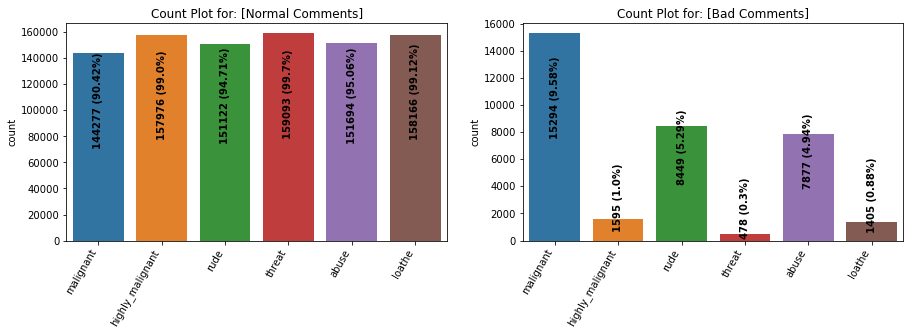

In [20]:
#comparing normal comments and bad comments using count plot
fig, ax = plt.subplots(1,2,figsize=(15,4))
for i in range(2):
    sns.countplot(data=df[output_labels][df[output_labels]==i], ax=ax[i])
    if i == 0:
        ax[i].set_title("Count Plot for: [Normal Comments]")
    else:
        ax[i].set_title("Count Plot for: [Bad Comments]")
        
    ax[i].set_xticklabels(output_labels,rotation=60, ha="right")

    p=0
    for prop in ax[i].patches:
        count = prop.get_height()
        s = f"{count} ({round(count*100/len(df),2)}%)"
        ax[i].text(p,count/2,s,rotation=90, ha="center", fontweight="bold")
        p += 1

plt.show()

#### Remarks:
- Dataset consists of higher number of **`Normal Comments` than `Bad or Malignant Comments`**. ***Therefore, it is clear that dataset is imbalanced and needs to be handle accordingly.**
- Most of the bad comments are of type `malignant` while least number of type `threat` is present in dataset.
- Majority of bad comments are of type `malignant`, `rude` and `abuse`.

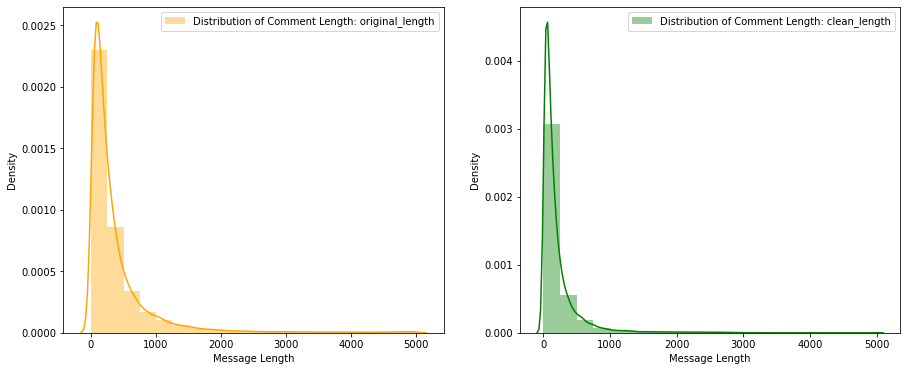

In [21]:
#Comparing the comment text length distribution before cleaning and after cleaning
fig, ax = plt.subplots(1,2,figsize=(15,6))
j=0
colors = ['orange','green']
for i in df.columns[-2:]:
    label_text = f"Distribution of Comment Length: {i}"
    sns.distplot(df[i],ax=ax[j],bins=20,color=colors[j],label=label_text)
    ax[j].set_xlabel("Message Length")
    ax[j].legend()
    j += 1
    
plt.show()

#### Remarks:
- Before cleaning comment text, most of the comment's length lies between 0 to 1100 while after cleaning, it lies between 0 to 900.

### WordCloud: Getting sense of loud words in each of the `output labels`.

In [22]:
#importing required libraries
from wordcloud import WordCloud

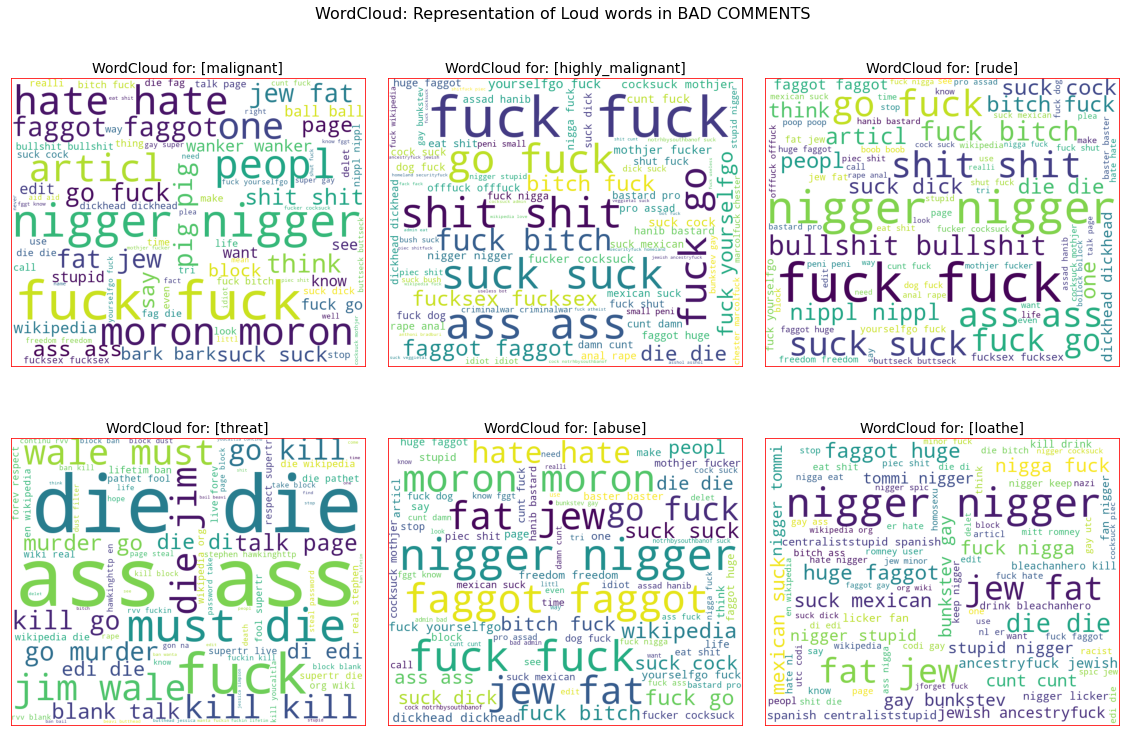

In [23]:
cols = 3
rows = len(output_labels)//cols
if len(output_labels) % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(16,rows*cols*1.8))
fig.subplots_adjust(top=0.8, hspace=0.3)

p=1
for i in output_labels:
    word_cloud = WordCloud(height=650,width=800,background_color="white",max_words=80).generate(' '.join(df.comment_text[df[i]==1]))
    ax = fig.add_subplot(rows,cols,p)
    ax.imshow(word_cloud)
    ax.set_title(f"WordCloud for: [{i}]",fontsize=14)
    for spine in ax.spines.values():
        spine.set_edgecolor('r')
       
    ax.set_xticks([])
    ax.set_yticks([])
    p += 1

fig.suptitle("WordCloud: Representation of Loud words in BAD COMMENTS",fontsize=16)
fig.tight_layout(pad=2)
plt.show()

#### Remarks:
- From wordcloud of `malignant` comments, it is clear that it mostly consists of words like fuck, nigger, moron, hate, suck ect.
- From wordcloud of `highly_malignant` comments, it is clear that it mostly consists of words like ass, fuck, bitch, shit, die, suck, faggot ect.
- From wordcloud of `rude` comments, it is clear that it mostly consists of words like nigger, ass, fuck, suck, bullshit, bitch etc.
- From wordcloud of `threat` comments, it is clear that it mostly consists of words like die, must die, kill, murder etc.
- From wordcloud of `abuse` comments, it is clear that it mostly consists of words like moron, nigger, fat, jew, bitch etc.
- From wordcloud of `loathe` comments, it is clear that it mostly consists of words like nigga, stupid, nigger, die, gay cunt etc.

### EDA Concluding Remark:
> Starting with univariate analysis, with the help of **count plot** it was found that dataset is imbalanced with having higher number of records for normal comments than bad comments (including `malignant, highly malignant, rude, threat, abuse and loathe`). Also, with the help of **distribution plot** for comments length, it was found that after cleaning, most of comments length decreases from range 0-1100 to 0-900. Moving further with **wordcloud**, it was found that `malignant` comments consists of words like fuck, nigger, moron, hate, suck ect., `highly_malignant` comments consists of words like ass, fuck, bitch, shit, die, suck, faggot ect., `rude` comments consists of words like nigger, ass, fuck, suck, bullshit, bitch etc., `threat` comments consists of words like die, must die, kill, murder etc., `abuse` comments consists of words like moron, nigger, fat, jew, bitch etc. and `loathe` comments consists of words like nigga, stupid, nigger, die, gay cunt etc.

## Preparing Data for Model Training & Testing

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from scipy.sparse import csr_matrix

### 1. Convert text to Vectors

In [25]:
#Converting text to vectors using TfidfVectorizer
tfidf = TfidfVectorizer(max_features=4000)
features = tfidf.fit_transform(df.comment_text).toarray()

#interpreting features
features.shape

(159571, 4000)

### 2. Seperating Input and Output Variables

In [26]:
#input variables
X = features

#output variables
Y = csr_matrix(df[output_labels]).toarray()

#checking shapes
print(X.shape)
print(Y.shape)

(159571, 4000)
(159571, 6)


### 3. Training & Testing Model

In [27]:
#importing required libraries
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import hamming_loss, log_loss, accuracy_score, classification_report
import timeit, sys
import tqdm.notebook as tqdm

In [28]:
#Function to train and test model
def build_models(models,x,y,test_size=0.33,random_state=42):
    #spliting train test data using train_test_split
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size,random_state=random_state)
    
    #training models using BinaryRelevance of problem transform
    for i in tqdm.tqdm(models,desc="Building Models"):
        start_time = timeit.default_timer()
        
        sys.stdout.write("\n=======================================================================================\n")
        sys.stdout.write(f"Current Model in Progress: {i} ")
        sys.stdout.write("\n=======================================================================================\n")
        
        br_clf = BinaryRelevance(classifier=models[i]["name"],require_dense=[True,True])
        print("Training: ",br_clf)
        br_clf.fit(x_train,y_train)
        
        print("Testing: ")
        predict_y = br_clf.predict(x_test)
        
        ham_loss = hamming_loss(y_test,predict_y)
        sys.stdout.write(f"\n\tHamming Loss  : {ham_loss}")
                
        ac_score = accuracy_score(y_test,predict_y)
        sys.stdout.write(f"\n\tAccuracy Score: {ac_score}")
        
        cl_report = classification_report(y_test,predict_y)
        sys.stdout.write(f"\n{cl_report}")
        
        end_time = timeit.default_timer()
        sys.stdout.write(f"Completed in [{end_time-start_time} sec.]")
        
        models[i]["trained"] = br_clf
        models[i]["hamming_loss"] = ham_loss
        models[i]["accuracy_score"] = ac_score
        models[i]["classification_report"] = cl_report
        models[i]["predict_y"] = predict_y
        models[i]["time_taken"] = end_time - start_time
                      
        sys.stdout.write("\n=======================================================================================\n\n\n")
    
    models["x_train"] = x_train
    models["y_train"] = y_train
    models["x_test"] = x_test
    models["y_test"] = y_test
    
    return models

In [29]:
#### preparing list of models
models = {
    "GaussianNB": {
        "name":GaussianNB(),
    },
    "MultinomialNB":{
        "name":MultinomialNB(),
    },    
}


#taking the one forth of the data for training and testig
half = len(df)//4
trained_models = build_models(models,X[:half,:],Y[:half,:])

Building Models:   0%|          | 0/2 [00:00<?, ?it/s]


Current Model in Progress: GaussianNB 
Training:  BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
Testing: 

	Hamming Loss  : 0.21560957083175086
	Accuracy Score: 0.4729965818458033
              precision    recall  f1-score   support

           0       0.16      0.79      0.26      1281
           1       0.08      0.46      0.13       150
           2       0.11      0.71      0.19       724
           3       0.02      0.25      0.03        44
           4       0.10      0.65      0.17       650
           5       0.04      0.46      0.07       109

   micro avg       0.11      0.70      0.20      2958
   macro avg       0.08      0.55      0.14      2958
weighted avg       0.12      0.70      0.21      2958
 samples avg       0.05      0.07      0.05      2958
Completed in [66.71356009999994 sec.]



Current Model in Progress: MultinomialNB 
Training:  BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])
Testing: 

	Hamming Loss  : 0.0240

#### Remarks:
> From the above model comparision it is clear that **MultinomialNB** performs better with **Accuracy Score: 90.74% and Hamming Loss: 2.4%** than other models. Therefore, proceeding with MultinoimialNB.

## Model Saving or Serialization

In [30]:
import joblib
#selecting best model
best_model = trained_models['MultinomialNB']['trained']

#saving model
joblib.dump(best_model,open('malignant_comments_classifier.obj','wb'))

## Preprocessing Pipeline

The following preprocessing pipeline is required to perform model prediction:
1. Load dataset
2. Remove null values
3. Drop column id
4. Convert comment text to lower case and replace '\n' with single space.
5. Keep only text data ie. a-z' and remove other data from comment text.
6. Remove stop words and punctuations
7. Apply Stemming using SnowballStemmer
8. Covert text to vectors using TfidfVectorizer
9. Load saved or serialized model
10. Predict values

In [31]:
#Load dataset
df_test = pd.read_csv('test.csv')

In [32]:
#Remove null values
if df_test.isnull().sum()[1] != 0:
    df_test.dropna(inplace=True)

In [33]:
#Drop coulmn id
df_test.drop(columns=['id'],inplace=True)

In [34]:
#Convert comment text to lower case and replace '\n' with single space
df_test["comment_text"] = df_test.comment_text.str.lower()
df_test["comment_text"] = df_test.comment_text.str.replace('\n',' ')

In [35]:
#Keep only text data i.e., a-z' and remove other data from comment text.
df_test.comment_text = df_test.comment_text.apply(lambda x: ' '.join(regexp_tokenize(x,"[a-z']+")))

In [36]:
#Remove stopwords
df_test.comment_text = df_test.comment_text.apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words).strip())

#Remove punctuations
df_test.comment_text = df_test.comment_text.str.replace("[^\w\d\s]","")

In [37]:
#Apply stemming using SnowballStemmer
df_test.comment_text = df_test.comment_text.apply(lambda x: ' '.join(snb_stem.stem(word) for word in word_tokenize(x)))

In [38]:
#Convert text to vectors using TfidfVectorizer
test_features = tfidf.fit_transform(df_test.comment_text).toarray()

In [39]:
#Load saved or serialized model and predict
model_loaded = joblib.load('malignant_comments_classifier.obj')

#Make predictions
predict_test = model_loaded.predict(test_features)

In [40]:
#Saving predicted values to csv file
pd.DataFrame(predict_test.toarray()).to_csv('test_output.csv')

### Final Remarks:
> I am finishing this project with model MultinomialNB which gives the **final accuracy score of 90.74% and hamming loss: 2.4%** and this can be further improved by training with more specific data.